In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 6

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:11<00:00, 15489406.12it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


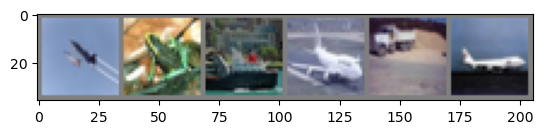

plane frog  ship  plane truck plane


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
#         print("outputs ", i , " :" ,outputs)        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')
print("=====================")


[1,  2000] loss: 2.260
[1,  4000] loss: 1.861
[1,  6000] loss: 1.646
[1,  8000] loss: 1.535
[2,  2000] loss: 1.454
[2,  4000] loss: 1.395
[2,  6000] loss: 1.349
[2,  8000] loss: 1.346
Finished Training


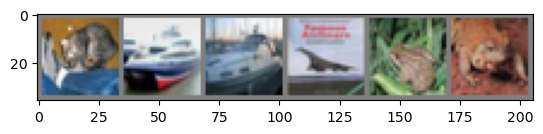

GroundTruth:  cat   ship  ship  plane


In [7]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [8]:
outputs = net(images)

In [9]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  ship  ship  ship  ship 


In [10]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
#         print("prediction shape 1: ", predicted.shape , "label shape 1: " , labels.shape)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        print("predicted: " , predicted)
        print("labels: " , labels)
        print("outputs: " , outputs)
        
        total += labels.size(0)
        print(labels.size(0))
#         print("prediction shape: ", predicted.shape , "label shape: " , labels.shape)

        correct += (predicted == labels).sum().item()
        
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

predicted:  tensor([8, 8, 8, 8, 6, 6])
labels:  tensor([3, 8, 8, 0, 6, 6])
outputs:  tensor([[ 0.9340, -2.0972,  1.0922,  1.2904, -0.1039,  0.2879,  0.4307, -1.6781,
          1.4405, -1.2172],
        [ 5.9785,  6.3156, -2.7664, -2.2873, -2.2687, -4.9449, -6.2003, -4.0699,
          8.0269,  3.2260],
        [ 3.0556,  4.1595, -1.5258, -1.4831, -2.1140, -2.7316, -3.7775, -1.7750,
          4.3031,  2.7944],
        [ 3.2190,  1.6794, -0.6659, -0.7986, -0.9066, -2.3593, -2.7173, -1.8180,
          3.8558,  1.4970],
        [-2.2159, -1.2307,  0.9057,  1.4811,  1.3563,  0.5431,  3.2493, -1.2882,
         -0.8524, -1.6273],
        [-1.4797, -1.9971,  1.2795,  1.1221,  1.4574,  0.6122,  2.8269, -0.7932,
         -0.9840, -1.7726]])
6
predicted:  tensor([1, 6, 3, 1, 8, 1])
labels:  tensor([1, 6, 3, 1, 0, 9])
outputs:  tensor([[ 0.6187,  2.1941,  0.5300,  0.0185, -0.7955,  0.3633, -0.6454, -1.3149,
         -0.6259,  0.8237],
        [-0.3635, -1.7318,  1.2908,  0.7390,  1.7851, -0.4695,  

In [11]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        print("prediction shape: ", predicted.shape , "label shape: " , labels.shape)
        
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.Size([4]) label shape:  torch.Size([6])
prediction shape:  torch.